# Построение модели для рекомедации тарифов

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — она выполнена в проекте «Статистический анализ данных».

Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

**Описание проекта**

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75.

Проверьте accuracy на тестовой выборке самостоятельно.

## Цели проекта

- Построить модель для задачи классификации, которая выберет подходящий тариф для клиентов Мегалайн.
- Построение модели с максимально большим значением accuracy (не менее 0.75)
- Проверка accuracy на тестовой выборке

#### Используемый стек инструментов


    python
    pandas
    matplotlib
    numpy
    scipy
    math
    seaborn
    plotly
    sklearn

### План выполнения работы:

***1. Изучение общей информации о данных***

***2. Построение моделей классификации***

    2.1 Решающее дерево
    
    2.2 Случайный лес
    
    2.3 Логистическая регрессия
    
    2.4 Проверка на тестовой выборке
    
***3. Проверка вменяемости модели***

***4. Общий вывод***

### Описание данных:

Каждый объект в наборе данных users_behavior.csv — это информация о поведении одного пользователя за месяц.

    сalls — количество звонков,
    minutes — суммарная длительность звонков в минутах,
    messages — количество sms-сообщений,
    mb_used — израсходованный интернет-трафик в Мб,
    is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).


### 1. Изучение общей информации о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
import joblib

In [2]:
# читаем данные из .csv файла с помощью метода read_csv()
try:
    df = pd.read_csv('D:\\python\\project_6\\users_behavior.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [3]:
display(df.describe())
display(df.info())

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

In [4]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

In [5]:
df['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

In [6]:
df.duplicated().sum()

0

''

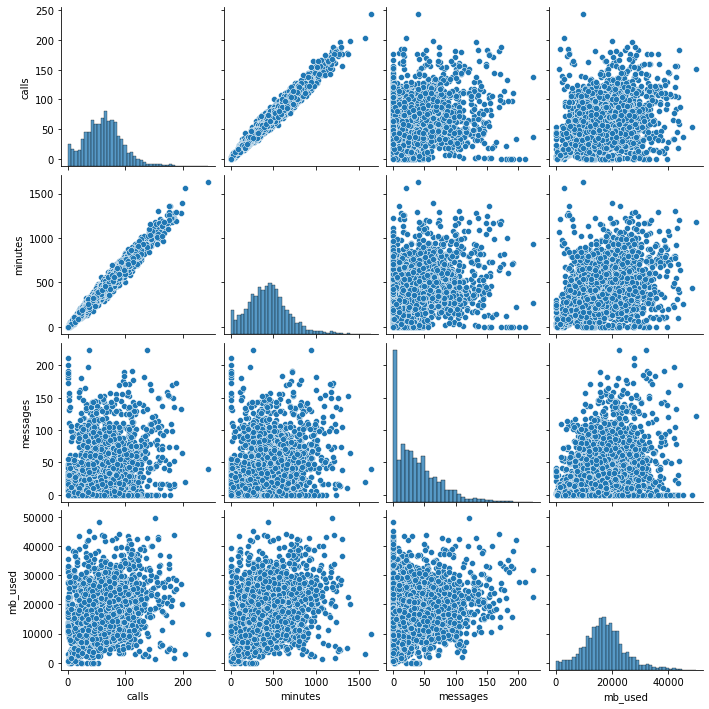

In [7]:
sns.pairplot(df[['calls','minutes','messages','mb_used']])
;

In [8]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


In [9]:
# Показатель calls напрямую взаимосвязан с minutes. Удалим лишний столбец.
#df = df.drop(['calls'], axis=1)
#df.head()

- Среднее и медиана не сильно отличаются друг от друга по основным показателям пользователей тарифов.
- Пропусков не обнаружено.
- Тип данных соответствует содержимому.
- Дубликатов не обнаружено.
- В таблице присутствуют всего два показателя по тарифам, что тоже хорошо(«Ультра» — 1, «Смарт» — 0).
- Итого похоже, что мы действительно имеем дело с предобработанными данными.

### 2. Построение моделей классификации

- Признаками в исходных данных являются столбцы: calls, minutes, messages, mb_used. 
- Целевой признак, то есть признак, который необходимо определить - это столбец is_ultra.

In [10]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

Разделим данные на обучающую, валидационную и тестовую выборки в пропорции 3:1:1 соответственно (60% на обучающию и по 20% данных на валидационную и тестовую выборки). Такое соотношение оптимально, нет риска переобучения модели.

In [11]:
# 1 этап разделения на обучающую выборку features_train и валидационную + тестовую features_valid
# отделяем 40% (20% данных для валидационной и 20% для тестовой) выборки
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345) 

print('Размер обучающей выборки:', features_train.shape[0],'объектов')
print('Размер "валидационной + тестовой" выборки:', features_valid.shape[0],'объектов')
print('----------------------------')

# разделим полученные 40% выборки на валидационную + тестовую. Разделим данные напополам

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345) 

print('Размер валидационной выборки:', features_valid.shape[0],'объекта')
print('Размер тестовой выборки:', features_test.shape[0],'объекта')
print('----------------------------')


Размер обучающей выборки: 1928 объектов
Размер "валидационной + тестовой" выборки: 1286 объектов
----------------------------
Размер валидационной выборки: 643 объекта
Размер тестовой выборки: 643 объекта
----------------------------


#### 2.1 Решающее дерево

Depth: 1        Accuracy: 0.7542768273716952
Depth: 2        Accuracy: 0.7822706065318819
Depth: 3        Accuracy: 0.7853810264385692
Depth: 4        Accuracy: 0.7791601866251944
Depth: 5        Accuracy: 0.7791601866251944
Depth: 6        Accuracy: 0.7838258164852255
Depth: 7        Accuracy: 0.7822706065318819
Depth: 8        Accuracy: 0.7791601866251944
Depth: 9        Accuracy: 0.7822706065318819




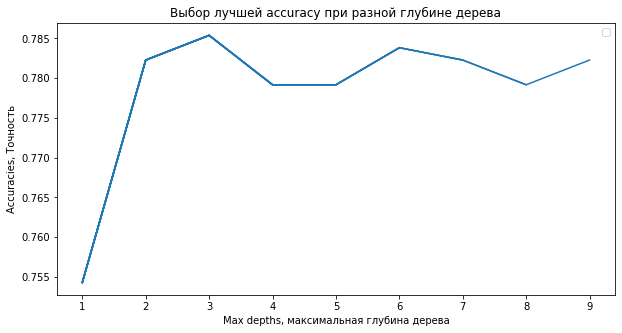





DecisionTreeClassifier
Accuracy наилучшей модели на валидационной выборке: 0.7853810264385692 Глубина дерева: 3
--------------------


In [13]:
#обучим модель Дерево Решений и проверим разные глубины
depths = []
DTC_accuracies = []

best_model_DTC = None
best_result_DTC = 0
best_depth_DTC = 0

plt.figure(figsize=(10, 5))

for depth in range(1,10):
    # обучение модели с заданной глубиной дерева
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    # обучение модели на тренировочной выборке
    model.fit(features_train,target_train)
    #  предсказания модели на валидационной выборке
    predictions = model.predict(features_valid)
    # подчет качества модели result
    score = accuracy_score(target_valid, predictions)
    
    depths.append(depth)
    DTC_accuracies.append(score)
    
    if score > best_result_DTC:
        best_model_DTC = model
        best_result_DTC = score
        best_depth_DTC = depth
        
    print('Depth:', depth, end='')
    print('        Accuracy:', score)
    sns.lineplot(data=pd.DataFrame(data=DTC_accuracies, index=depths),dashes=False)
    plt.legend('')
print('\n')
plt.title("Выбор лучшей accuracy при разной глубине дерева", fontsize=12) 
plt.ylabel("Accuracies, Точность") 
plt.xlabel("Max depths, максимальная глубина дерева")
plt.show()
print('\n\n')

print()
print('DecisionTreeClassifier')
print("Accuracy наилучшей модели на валидационной выборке:", best_result_DTC, "Глубина дерева:", best_depth_DTC)
print(20*'-')

#### 2.2 Случайный лес

Estimator: 1        Accuracy: 0.7107309486780715
Estimator: 2        Accuracy: 0.7636080870917574
Estimator: 3        Accuracy: 0.7387247278382582
Estimator: 4        Accuracy: 0.7713841368584758
Estimator: 5        Accuracy: 0.749611197511664
Estimator: 6        Accuracy: 0.7807153965785381
Estimator: 7        Accuracy: 0.7682737169517885
Estimator: 8        Accuracy: 0.7822706065318819
Estimator: 9        Accuracy: 0.7729393468118196
Estimator: 10        Accuracy: 0.7853810264385692
Estimator: 11        Accuracy: 0.7838258164852255
Estimator: 12        Accuracy: 0.7869362363919129
Estimator: 13        Accuracy: 0.7822706065318819
Estimator: 14        Accuracy: 0.7838258164852255
Estimator: 15        Accuracy: 0.7838258164852255
Estimator: 16        Accuracy: 0.7869362363919129
Estimator: 17        Accuracy: 0.7869362363919129
Estimator: 18        Accuracy: 0.7931570762052877
Estimator: 19        Accuracy: 0.7884914463452566
Estimator: 20        Accuracy: 0.7869362363919129
Estimator:

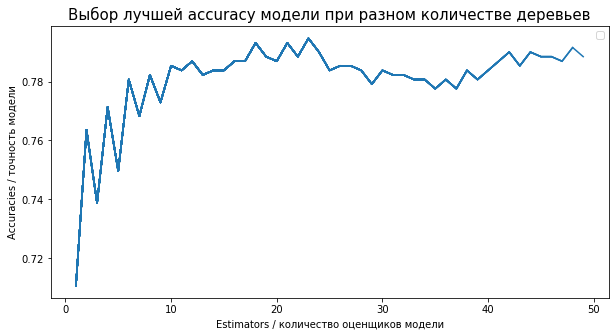





RandomForestClassifier
Accuracy наилучшей модели на валидационной выборке: 0.7947122861586314 Количество деревьев: 23 Максимальная глубина: 9
------------------------------


In [14]:
#Обучим модель случайный лес с разным количеством деревьев в лесу.

best_model_RFC = None
best_result_RFC = 0
best_est = 0
best_depth_RFC = 0

estimators = []
RFC_accuracies = []
plt.figure(figsize=(10, 5))

for est in range(1, 50):
    # обучаем модель с заданным количеством деревьев
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    # обучаем модель на обучающей тренировочной выборке
    model.fit(features_train, target_train)
        
    # считаем качество модели на валидационной выборке
    score = model.score(features_valid, target_valid)
    
    estimators.append(est)
    RFC_accuracies.append(score)
    
    if score > best_result_RFC:
            best_model_RFC = model
            best_result_RFC = score
            best_depth_RFC = depth
            best_est = est
    
    print('Estimator:', est, end='')
    print('        Accuracy:', score)

    sns.lineplot(data=pd.DataFrame(data=RFC_accuracies, index=estimators),legend='brief')
    plt.legend('')
print('\n')
plt.title("Выбор лучшей accuracy модели при разном количестве деревьев", fontsize=15) 
plt.ylabel("Accuracies / точность модели") 
plt.xlabel("Estimators / количество оценщиков модели")
plt.show()
print('\n\n')

print()
print('RandomForestClassifier')
print("Accuracy наилучшей модели на валидационной выборке:", 
      best_result_RFC, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth_RFC)
print(30*'-')

#### 2.3 Логистическая регрессия

In [15]:
from joblib import dump
#обучим модель логистической регрессии

model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features, target)
result_regress = model.score(features, target)
dump(model, 'model_9_1.joblib')
print("Accuracy модели логистической регрессии:", model.predict(features))
print('Параметры лучшей модели:', result_regress)

Accuracy модели логистической регрессии: [0 0 0 ... 0 1 0]
Параметры лучшей модели: 0.7479775980087119


### Вывод

Были проанализированы различные классификационные модели: 

- Решающее дерево, 
- Случайный лес, 
- Логистическая регрессия.

Каждая модель была обучена для различных сочетаний гиперпараметров; выведены наилучшие варианты для каждой модели.
     
**DecisionTreeClassifier**       
Accuracy наилучшей модели на валидационной выборке: 0.785 Глубина дерева: 3

**RandomForestClassifier**
Accuracy наилучшей модели на валидационной выборке: 0.794 Количество деревьев: 23 Максимальная глубина: 9

**LogisticRegression**
Accuracy модели логистической регрессии:
Параметры лучшей модели: 0.7479775980087119

**Итог:**

**Наилучшая точность (accuracy) была достигнута для модели RandomForestClassifier Случайный лес:**

Accuracy наилучшей модели на валидационной выборке: **0.794** Количество деревьев: **23** Максимальная глубина: **9**

#### 2.4 Проверка на тестовой выборке

In [16]:
predictions_test_tree = best_model_DTC.predict(features_test) 
result_test_tree = accuracy_score(target_test, predictions_test_tree).round(3)
print('DecisionTreeClassifier: Accuracy модели на тестовой выборке', result_test_tree)

DecisionTreeClassifier: Accuracy модели на тестовой выборке 0.779


In [17]:
predictions_test_forest = best_model_RFC.predict(features_test) 
result_test_forest = accuracy_score(target_test, predictions_test_forest).round(3) 
print('RandomForestClassifier Accuracy модели на тестовой выборке', result_test_forest)

RandomForestClassifier Accuracy модели на тестовой выборке 0.781


In [18]:
from joblib import dump
#обучим модель логистической регрессии

model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_test, target_test)
predictions_regress = model.predict(features_test)
result_test_regress = accuracy_score(target_test, predictions_regress).round(3)

dump(model, 'model_9_1.joblib')
print("Accuracy модели логистической регрессии на тестовой выборке:", result_test_regress)
print('Параметры лучшей модели:', model)

Accuracy модели логистической регрессии на тестовой выборке: 0.686
Параметры лучшей модели: LogisticRegression(max_iter=1000, random_state=12345)


In [19]:
data = {'validate':[best_result_DTC, best_result_RFC, result_regress], 'test':[result_test_tree, 
                                                                                   result_test_forest,
                                                                                   result_test_regress]}
table = pd.DataFrame(data)
table.index = ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия']
table

,validate,test
Решающее дерево,0.785381,0.779
Случайный лес,0.794712,0.781
Логистическая регрессия,0.747978,0.686


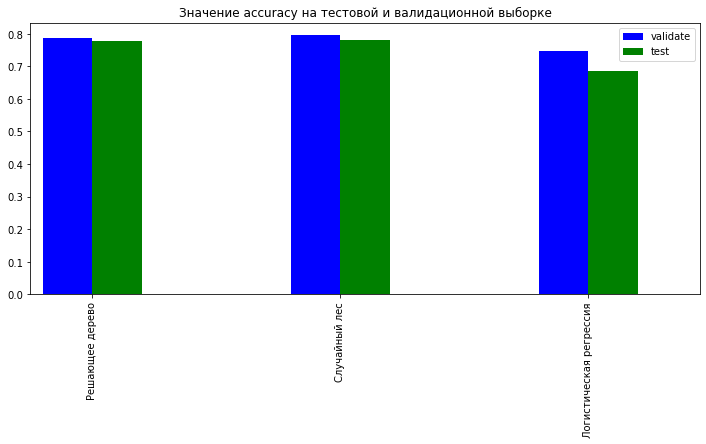

In [20]:
ax=plt.gca()
                                            
table.plot(y='validate', kind='bar', ax=ax, position=1, color='blue', figsize=(12,5), width=0.2)
table.plot(y='test', kind='bar', ax=ax, position=0, color='green', figsize=(12,5), width=0.2)

plt.title('Значение accuracy на тестовой и валидационной выборке')

plt.show()



Лучший результат показывает случайный лес (0,794), решающее дерево (accuracy на валидационной выборке 0,785) немного уступает. Логистическая регрессия показала наихудший результат (0,75). В целом результаты по тестовой выборке несколько уступают результатам по валидационной выборке.

### 3. Проверка вменяемости модели

In [21]:
df['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Наша модель всегда будет предсказывать тариф «Смарт». Тогда точность модели будет равна примерно 69%, но точность нашей лучшей модели больше и равна 79%. Можем заключить, что проверка на адекватность пройдена успешно!

### 4. Общий вывод

### Вывод

Данные успешно загружены и проанализированы различные классификационные модели: 

- Решающее дерево, 
- Случайный лес, 
- Логистическая регрессия.

Каждая модель была обучена для различных сочетаний гиперпараметров; выведены наилучшие варианты для каждой модели.
     
**DecisionTreeClassifier**       
Accuracy наилучшей модели на валидационной выборке: 0.785 Глубина дерева: 3

**RandomForestClassifier**
Accuracy наилучшей модели на валидационной выборке: 0.794 Количество деревьев: 23 Максимальная глубина: 9

**LogisticRegression**
Accuracy модели логистической регрессии:
Параметры лучшей модели: 0.7479775980087119

**Итог:**

**Наилучшая точность (accuracy) была достигнута для модели RandomForestClassifier Случайный лес:**

Accuracy наилучшей модели на валидационной выборке: **0.794** Количество деревьев: **23** Максимальная глубина: **9**